In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
import os
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
import torch
from tools import utils
from PIL import Image
import numpy as np
from numpy import asarray

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Check dataset

In [3]:
from dataset import DatasetImg

In [7]:
dataset = DatasetImg('data/trainFinal/img', 'data/trainFinal/label')

In [8]:
len(dataset)

6696

('data/trainFinal/img/20140603_0004_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0004_BCCTC_tg_0_0.txt')
tensor(0.)


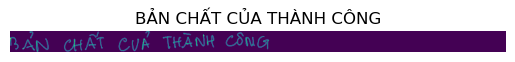

('data/trainFinal/img/20140603_0004_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0004_KQBDVN_tg_0_0.txt')
tensor(0.)


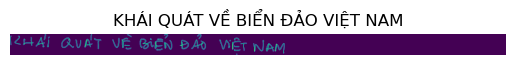

('data/trainFinal/img/20140603_0006_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0006_BCCTC_tg_0_0.txt')
tensor(0.)


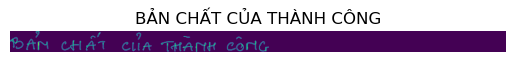

('data/trainFinal/img/20140603_0006_BCCTC_tg_0_7.png', 'data/trainFinal/label/20140603_0006_BCCTC_tg_0_7.txt')
tensor(0.)


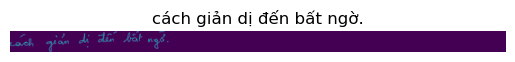

('data/trainFinal/img/20140603_0006_BCCTC_tg_1_6.png', 'data/trainFinal/label/20140603_0006_BCCTC_tg_1_6.txt')
tensor(0.)


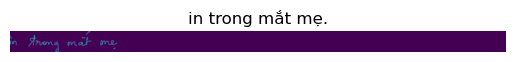

('data/trainFinal/img/20140603_0006_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0006_KQBDVN_tg_0_0.txt')
tensor(0.)


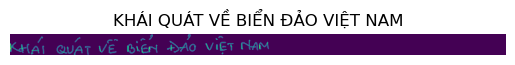

('data/trainFinal/img/20140603_0006_KQBDVN_tg_1_4.png', 'data/trainFinal/label/20140603_0006_KQBDVN_tg_1_4.txt')
tensor(0.)


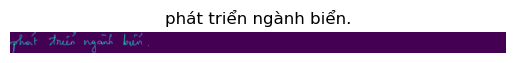

('data/trainFinal/img/20140603_0006_KQBDVN_tg_2_4.png', 'data/trainFinal/label/20140603_0006_KQBDVN_tg_2_4.txt')
tensor(0.)


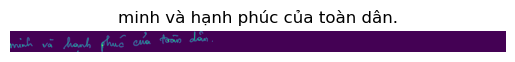

('data/trainFinal/img/20140603_0011_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0011_KQBDVN_tg_0_0.txt')
tensor(0.)


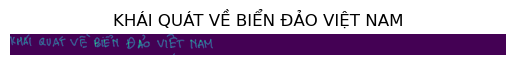

('data/trainFinal/img/20140603_0015_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0015_KQBDVN_tg_0_0.txt')
tensor(0.)


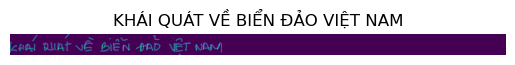

('data/trainFinal/img/20140603_0017_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0017_BCCTC_tg_0_0.txt')
tensor(0.)


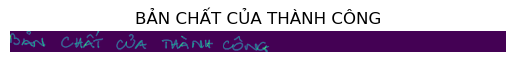

('data/trainFinal/img/20140603_0017_BCCTC_tg_0_7.png', 'data/trainFinal/label/20140603_0017_BCCTC_tg_0_7.txt')
tensor(0.)


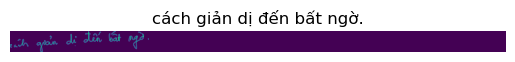

('data/trainFinal/img/20140603_0017_BCCTC_tg_1_6.png', 'data/trainFinal/label/20140603_0017_BCCTC_tg_1_6.txt')
tensor(0.)


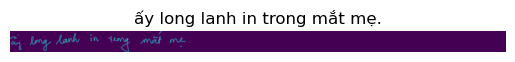

('data/trainFinal/img/20140603_0017_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0017_KQBDVN_tg_0_0.txt')
tensor(0.)


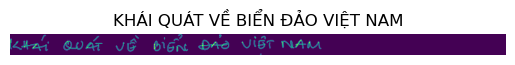

('data/trainFinal/img/20140603_0017_KQBDVN_tg_0_2.png', 'data/trainFinal/label/20140603_0017_KQBDVN_tg_0_2.txt')
tensor(0.)


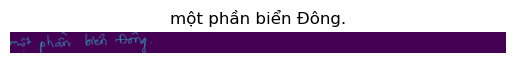

('data/trainFinal/img/20140603_0018_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0018_BCCTC_tg_0_0.txt')
tensor(0.)


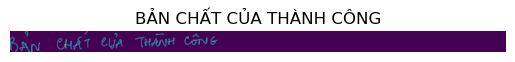

('data/trainFinal/img/20140603_0018_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0018_KQBDVN_tg_0_0.txt')
tensor(0.)


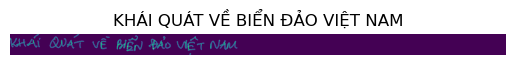

('data/trainFinal/img/20140603_0018_KQBDVN_tg_2_4.png', 'data/trainFinal/label/20140603_0018_KQBDVN_tg_2_4.txt')
tensor(0.)


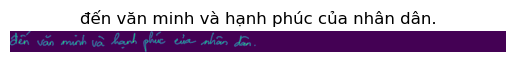

('data/trainFinal/img/20140603_0023_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0023_BCCTC_tg_0_0.txt')
tensor(0.0078)


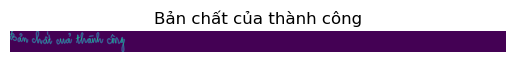

('data/trainFinal/img/20140603_0023_BCCTC_tg_0_4.png', 'data/trainFinal/label/20140603_0023_BCCTC_tg_0_4.txt')
tensor(0.)


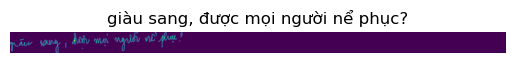

('data/trainFinal/img/20140603_0023_BCCTC_tg_0_7.png', 'data/trainFinal/label/20140603_0023_BCCTC_tg_0_7.txt')
tensor(0.)


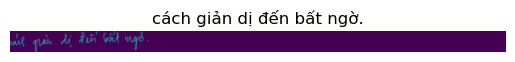

('data/trainFinal/img/20140603_0023_BCCTC_tg_2_6.png', 'data/trainFinal/label/20140603_0023_BCCTC_tg_2_6.txt')
tensor(0.)


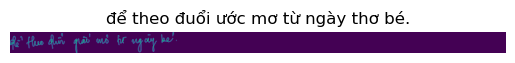

('data/trainFinal/img/20140603_0023_KQBDVN_tg_1_4.png', 'data/trainFinal/label/20140603_0023_KQBDVN_tg_1_4.txt')
tensor(0.)


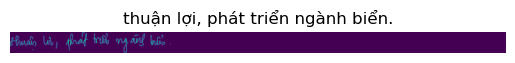

('data/trainFinal/img/20140603_0025_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0025_BCCTC_tg_0_0.txt')
tensor(0.)


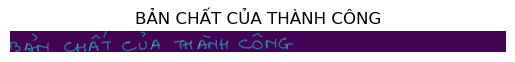

('data/trainFinal/img/20140603_0025_BCCTC_tg_0_7.png', 'data/trainFinal/label/20140603_0025_BCCTC_tg_0_7.txt')
tensor(0.)


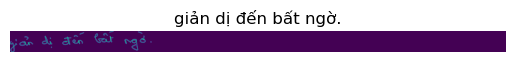

('data/trainFinal/img/20140603_0025_BCCTC_tg_1_6.png', 'data/trainFinal/label/20140603_0025_BCCTC_tg_1_6.txt')
tensor(0.)


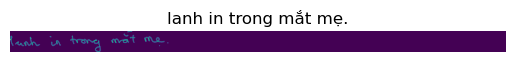

('data/trainFinal/img/20140603_0025_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0025_KQBDVN_tg_0_0.txt')
tensor(0.)


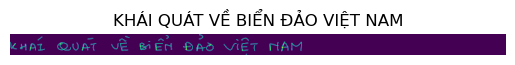

('data/trainFinal/img/20140603_0025_KQBDVN_tg_0_2.png', 'data/trainFinal/label/20140603_0025_KQBDVN_tg_0_2.txt')
tensor(0.)


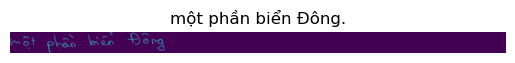

('data/trainFinal/img/20140603_0025_KQBDVN_tg_1_6.png', 'data/trainFinal/label/20140603_0025_KQBDVN_tg_1_6.txt')
tensor(0.)


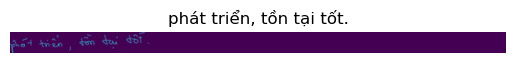

('data/trainFinal/img/20140603_0026_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0026_BCCTC_tg_0_0.txt')
tensor(0.)


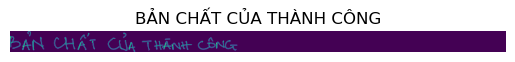

('data/trainFinal/img/20140603_0026_BCCTC_tg_0_5.png', 'data/trainFinal/label/20140603_0026_BCCTC_tg_0_5.txt')
tensor(0.)


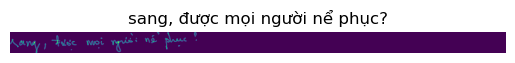

('data/trainFinal/img/20140603_0026_BCCTC_tg_0_8.png', 'data/trainFinal/label/20140603_0026_BCCTC_tg_0_8.txt')
tensor(0.)


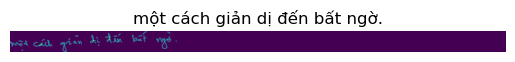

('data/trainFinal/img/20140603_0026_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0026_KQBDVN_tg_0_0.txt')
tensor(0.)


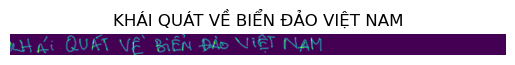

('data/trainFinal/img/20140603_0026_KQBDVN_tg_0_5.png', 'data/trainFinal/label/20140603_0026_KQBDVN_tg_0_5.txt')
tensor(0.)


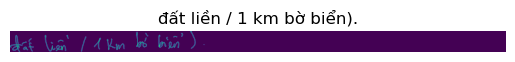

('data/trainFinal/img/20140603_0026_KQBDVN_tg_0_8.png', 'data/trainFinal/label/20140603_0026_KQBDVN_tg_0_8.txt')
tensor(0.)


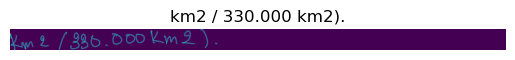

('data/trainFinal/img/20140603_0026_KQBDVN_tg_1_2.png', 'data/trainFinal/label/20140603_0026_KQBDVN_tg_1_2.txt')
tensor(0.)


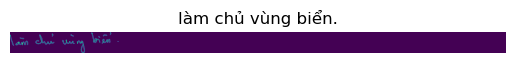

('data/trainFinal/img/20140603_0026_KQBDVN_tg_1_5.png', 'data/trainFinal/label/20140603_0026_KQBDVN_tg_1_5.txt')
tensor(0.)


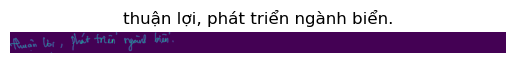

('data/trainFinal/img/20140603_0026_KQBDVN_tg_1_7.png', 'data/trainFinal/label/20140603_0026_KQBDVN_tg_1_7.txt')
tensor(0.)


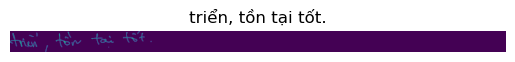

('data/trainFinal/img/20140603_0028_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0028_KQBDVN_tg_0_0.txt')
tensor(0.)


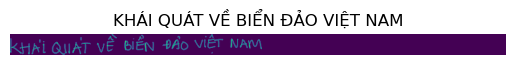

('data/trainFinal/img/20140603_0028_KQBDVN_tg_0_2.png', 'data/trainFinal/label/20140603_0028_KQBDVN_tg_0_2.txt')
tensor(0.)


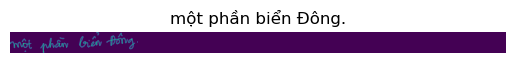

('data/trainFinal/img/20140603_0028_KQBDVN_tg_0_7.png', 'data/trainFinal/label/20140603_0028_KQBDVN_tg_0_7.txt')
tensor(0.)


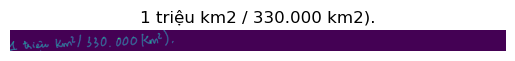

('data/trainFinal/img/20140603_0030_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0030_BCCTC_tg_0_0.txt')
tensor(0.)


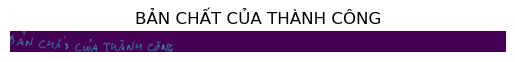

('data/trainFinal/img/20140603_0030_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0030_KQBDVN_tg_0_0.txt')
tensor(0.)


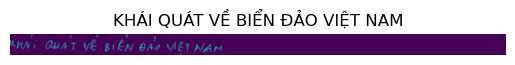

('data/trainFinal/img/20140603_0033_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0033_BCCTC_tg_0_0.txt')
tensor(0.)


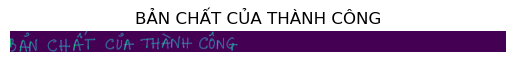

('data/trainFinal/img/20140603_0033_KQBDVN_tg_0_0.png', 'data/trainFinal/label/20140603_0033_KQBDVN_tg_0_0.txt')
tensor(0.)


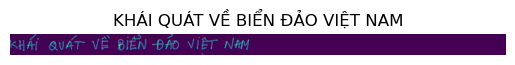

('data/trainFinal/img/20140603_0033_KQBDVN_tg_0_2.png', 'data/trainFinal/label/20140603_0033_KQBDVN_tg_0_2.txt')
tensor(0.)


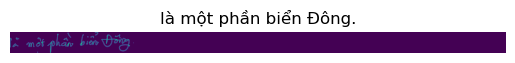

('data/trainFinal/img/20140603_0033_KQBDVN_tg_1_2.png', 'data/trainFinal/label/20140603_0033_KQBDVN_tg_1_2.txt')
tensor(0.)


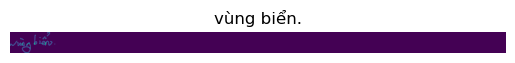

('data/trainFinal/img/20140603_0033_KQBDVN_tg_1_5.png', 'data/trainFinal/label/20140603_0033_KQBDVN_tg_1_5.txt')
tensor(0.)


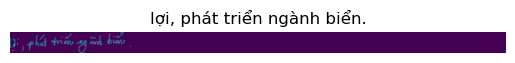

('data/trainFinal/img/20140603_0033_KQBDVN_tg_2_4.png', 'data/trainFinal/label/20140603_0033_KQBDVN_tg_2_4.txt')
tensor(0.)


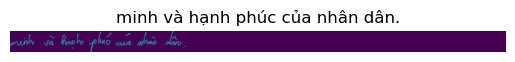

('data/trainFinal/img/20140603_0034_BCCTC_tg_0_0.png', 'data/trainFinal/label/20140603_0034_BCCTC_tg_0_0.txt')
tensor(0.)


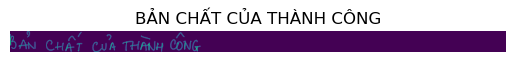

In [9]:
import matplotlib.pyplot as plt

for cnt in range(50):
    for i in [0 + cnt]:
        img, label = dataset[i]
        print(dataset.imlist[i%2232])
        print(img[0][0][0])
        plt.imshow(img[0])
        plt.title(label)
        plt.axis('off')
        plt.show()

# check Dataloader

In [14]:
dataset = DatasetImg('data/test/img', 'data/test/label')
dataloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=16,
                    shuffle=True)

In [15]:
len(dataloader), len(dataset)

(75, 1197)